In [54]:
import pandas as pd
import re

# Cargar datos con codificación latin1 para manejar caracteres especiales
df = pd.read_csv('datos.csv', encoding='latin1')

# Limpiar columnas numéricas: eliminar símbolos no numéricos (%, mph, etc.)
columnas_numericas = ['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'Precip']
for col in columnas_numericas:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'[^0-9.-]', '', regex=True)  # Solo números, "-" y "."
        .astype(float)
    )

# Convertir hora de formato 12h (a. m./p. m.) a 24h (HH:MM)
def limpiar_hora(hora_str):
    hora_str = re.sub(r'\s+', ' ', hora_str).replace('a. m.', 'AM').replace('p. m.', 'PM')
    try:
        return pd.to_datetime(hora_str, format='%I:%M %p').strftime('%H:%M')
    except:
        return hora_str  # Mantener original si hay error
df['Time'] = df['Time'].apply(limpiar_hora)

# Eliminar columnas no requeridas
df = df.drop(columns=['Time', 'Wind'])

# Guardar dataset limpio (sin índices y en UTF-8)
df.to_csv('datos_limpios_sin_time_wind.csv', index=False, encoding='utf-8')
print("¡Datos guardados correctamente!")

¡Datos guardados correctamente!


In [55]:
# Primeras 5 filas
print(df.head())

# Últimas 5 filas
print(df.tail())

# Muestra aleatoria de filas (ejemplo: 3 filas)
print(df.sample(3))

   Temperature  Dew Point  Humidity  Wind Speed  Wind Gust  Pressure  Precip  \
0          6.0        4.0      87.0         0.0        0.0    750.09     0.0   
1          5.0        3.0      87.0         0.0        0.0    750.09     0.0   
2          4.0        3.0      93.0         0.0        0.0    749.75     0.0   
3          4.0        3.0      93.0         0.0        0.0    749.41     0.0   
4          3.0        3.0     100.0         0.0        0.0    749.41     0.0   

  Condition  
0     Smoke  
1     Smoke  
2     Smoke  
3     Smoke  
4     Smoke  
       Temperature  Dew Point  Humidity  Wind Speed  Wind Gust  Pressure  \
28003         13.0        2.0      47.0         0.0        0.0    750.05   
28004          9.0       -2.0      46.0         7.0        0.0    750.55   
28005         11.0       -4.0      35.0         9.0        0.0    751.04   
28006          9.0       -4.0      40.0         0.0        0.0    751.04   
28007          9.0       -5.0      37.0         6.0    

In [56]:
print("Columnas del dataset:", df.columns.tolist())

Columnas del dataset: ['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'Precip', 'Condition']


In [57]:
print(df.info())  # Muestra tipos de datos, número de valores no nulos y uso de memoria.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28008 entries, 0 to 28007
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  28008 non-null  float64
 1   Dew Point    28008 non-null  float64
 2   Humidity     28008 non-null  float64
 3   Wind Speed   28008 non-null  float64
 4   Wind Gust    28008 non-null  float64
 5   Pressure     28008 non-null  float64
 6   Precip       28008 non-null  float64
 7   Condition    28008 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.7+ MB
None


In [58]:
# Para columnas numéricas
print(df.describe())

# Para columnas categóricas
print(df.describe(include='object'))

        Temperature     Dew Point      Humidity    Wind Speed  Wind Gust  \
count  28008.000000  28008.000000  28008.000000  28008.000000    28008.0   
mean      13.960583      6.145566     65.889817      8.482788        0.0   
std        5.709185      5.213969     25.279651      8.093120        0.0   
min      -18.000000    -25.000000      0.000000      0.000000        0.0   
25%       10.000000      3.000000     46.000000      0.000000        0.0   
50%       14.000000      7.000000     68.000000      7.000000        0.0   
75%       18.000000     10.000000     88.000000     12.870000        0.0   
max       30.000000     19.000000    100.000000    206.000000        0.0   

           Pressure   Precip  
count  28008.000000  28008.0  
mean     750.225028      0.0  
std        9.127378      0.0  
min        0.000000      0.0  
25%      749.310000      0.0  
50%      750.420000      0.0  
75%      751.540000      0.0  
max      756.480000      0.0  
       Condition
count      28008
un

Valores faltantes por columna:
Temperature    0
Dew Point      0
Humidity       0
Wind Speed     0
Wind Gust      0
Pressure       0
Precip         0
Condition      0
dtype: int64


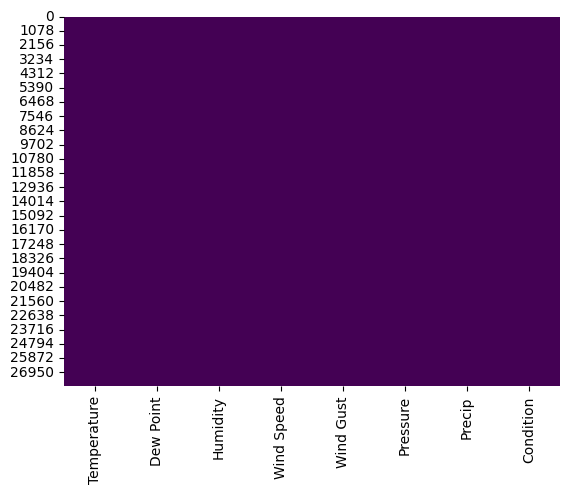

In [59]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Opcional: Gráfico de valores faltantes (requiere matplotlib/seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [60]:
print("Valores únicos por columna:")
print(df.nunique())

Valores únicos por columna:
Temperature    35
Dew Point      43
Humidity       87
Wind Speed     55
Wind Gust       1
Pressure       92
Precip          1
Condition      32
dtype: int64


In [61]:
df = df.drop(columns=['Wind Gust', 'Precip'])

In [62]:
columna_categorica = 'Condition'
print(df[columna_categorica].value_counts())

Condition
Fair                       9135
Mostly Cloudy              7656
Partly Cloudy              4497
Cloudy                     2617
Fog                        1059
Mist                        678
Light Rain                  641
Haze                        400
Light Rain with Thunder     320
Smoke                       254
Rain                        185
T-Storm                     171
Thunder                     150
Mostly Cloudy / Windy        56
Partly Cloudy / Windy        37
Fair / Windy                 30
Heavy T-Storm                30
Light Drizzle                21
Cloudy / Windy               12
Heavy Rain                   10
T-Storm / Windy               9
Light Rain / Windy            9
Heavy T-Storm / Windy         7
Rain / Windy                  7
Thunder / Windy               6
Heavy Rain / Windy            3
Drizzle                       3
Patches of Fog                1
Smoke / Windy                 1
Mostly Cloud                  1
Mist / Windy                  